## Introduction to data files



Today we are going to jump right into loading data from files into numpy arrays. Once we have the arrays, then we will then start learning how to use them.



## Loading data from a text file



Usually, data will be in a file, and we need to read it in. There are *many* data formats to get familiar with, and *many* ways to read them in. Let's start by looking at data from a Raman spectrometer.

In this directory there is a file called 01-raman.txt. The file name suggests it is Raman data, but only because of its name. The extension *suggests* this is text data, but does not tell us the format.

*You cannot in general rely on the extension to tell you what format a file is in. That is an advertisement, and only a convention that is used. You can rename a file and its extension at any time and not change the data.*

It is not obvious what is in the file. Unless you made the file, or someone has told you what is in it, the only thing you can do is inspect the file manually. Let's look at the number of lines and the first 10 lines here.

We do that by opening the file, reading the lines and then closing the file. We print the number of lines and the first 10 here.



In [1]:
f = open('01-raman.txt')
lines = f.readlines()
f.close()

print(f'{len(lines)} lines in the file')
print(lines[0:10])

7620 lines in the file
['500\t294.37869\n', '500.39374\t288.922\n', '500.78751\t286.06622\n', '501.18124\t275.22284\n', '501.57501\t275.11938\n', '501.96875\t287.81372\n', '502.36252\t299.50803\n', '502.75626\t285.56567\n', '503.15002\t292.69519\n', '503.54376\t295.33951\n']

You might notice the "\t" and "\n" characters. The first is a tab, and the second is a new line (the new line is what defines a line, each line ends with this character). This looks like a *tab-delimited* text file, with two columns where the numbers are separated by tabs. Unfortunately, there is no information about *what* the columns are. You have to know from some other context. This file is from a Raman spectrometer, and the first column is the wavenumber, and the second column is the intensity.

It is important that you remember to close the file. If you are reading lots of files, you can run into operating system errors if you open too many open files. Python is at your service with a *context manager*. This approach will *automatically* close the file when it goes of scope.



In [1]:
with open('01-raman.txt') as f:
    # f is only open and available inside this body
    lines = f.readlines()
    print(f'Inside: {f.closed}')

print(f'Outside: {f.closed}')

Inside: False
Outside: True

### Simple loading into numpy



There is an easy way for us to read this file so we can get the data into Python for analysis, via `np.loadtxt`. Let's start with the simplest method. We simply use the filename as the only argument.



In [1]:
import numpy as np
data = np.loadtxt('01-raman.txt')
data

array([[ 500.      ,  294.37869 ],
       [ 500.39374 ,  288.922   ],
       [ 500.78751 ,  286.06622 ],
       ...,
       [3499.2124  ,   87.969734],
       [3499.6062  ,   83.638931],
       [3500.      ,   84.009064]])

We can see the shape here, which confirms that we have read the number of lines, and that there are two columns.



In [1]:
data.shape

| 7620 | 2 |

It is often helpful to separate this array into variables. The first column is the wavenumber and the second column is the intensity. We use indexing to extract these into variables. This is a 2D array, and we index using a notation of `[row, col]` where `row` indicates which row(s) we want, and `col` indicates which column(s) we want. If you use a `:` it means all of them. Indexing can be very complex ([https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)), and we will return to it many times as we do more and more sophisticated things.



In [1]:
wavenumber = data[:, 0]
intensity = data[:, 1]

(wavenumber.shape, intensity.shape)

| 7620 |
| 7620 |

Now, these variables are 1D arrays.

Alternatively, you can *unpack* an array. When you iterate over an array, you iterate over its rows. If we transpose this data, we will change it from two columns with a lot of rows into two rows with a lot of columns.



In [1]:
wavenumber, intensity = data.T
(wavenumber.shape, intensity.shape)

| 7620 |
| 7620 |

Here are some examples of indexing these arrays:



In [1]:
# first and last element
(wavenumber[0], wavenumber[-1])

| 500.0 | 3500.0 |

In [1]:
# first five and last 5 elements
(intensity[0:5], intensity[-5:])

| array | ((294.37869 288.922 286.06622 275.22284 275.11938)) | array | ((86.151878 85.178947 87.969734 83.638931 84.009064)) |

You might be tempted to get the last five elements like this, but it is wrong. Remember in indexing the last element in the slice is not included. Since you specify -1 in the slice it means up to *but not including* the last element. In contrast, `[-5:]` means from the fifth to last element to the end, *including the end*.



In [1]:
intensity[-5:-1]

array([86.151878, 85.178947, 87.969734, 83.638931])

There are even fancier ways to slice this, e.g. to get every other point or every nth point, or even a set of selected points. We will see these later.

That is a lot of data. How do we see what is in it? Visualization.



### Simple visualization of the data



[matplotlib](https://matplotlib.org/) is the primary plotting tool we will use. There are a few others that are popular, especially [seaborn](https://seaborn.pydata.org/). It is good advice that when you want to make a plot, a good way to do it is find an example plot like it and see if you can adapt that code to your data.

-   **matplotlib sample plots:** [https://matplotlib.org/tutorials/introductory/sample_plots.html](https://matplotlib.org/tutorials/introductory/sample_plots.html)
-   **matplotlib gallery:** [https://matplotlib.org/gallery/index.html](https://matplotlib.org/gallery/index.html)
-   **seaborn gallery:** [https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html)

There are many other plotting libraries, e.g. [plotly](https://plot.ly/) and [altair](https://altair-viz.github.io/gallery/index.html#gallery-category-interactive-charts) that are more suitable for web graphics. These have much more complex APIs and it takes a long time to get familiar with them.

We will start simple. Let's start by telling the notebook how to use matplotlib and then load it. The line starting with a % is called a [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html), and it is only valid in Jupyter-Python, or a jupyter notebook. It is *not* valid Python. It tells the Jupyter kernel how to handle plots, and in this case we are telling it to put the plot inline as a PNG image in the notebook.



In [1]:
import matplotlib.pyplot as plt

We can make a plot as simple as this:



:RESULTS:
 
 :END:

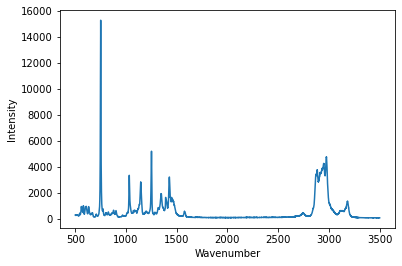

In [1]:
plt.plot(wavenumber, intensity)
plt.xlabel('Wavenumber')
plt.ylabel('Intensity');

Now, we have a graphical representation of this data set. You can interact with it in the notebook. You can see the coordinates, and zoom in on regions. Suppose we want to make sure we *reproducibly* zoom in to a region though. That requires us to script it so that you have a written record of what you did.

Let's make a plot of a subset of the spectrum, say the points where the wavenumber is at least 1000, and less than 1500. To do that, we need a way to select the data subset. We can use indexing for this purpose. We define a *boolean* array where it is True for the points we want, and False for the ones we do not want. The comparison operators will do this, and the logical & operator combines the two conditions. Note these are all elementwise operations.



In [1]:
# indices of points where 1000 >= wavenumber > 1500
# True means it meets the criteria, False means it does not
ind = (wavenumber >= 1000) & (wavenumber < 1500)
ind

:RESULTS:
 array([False, False, False, ..., False, False, False])
 :END:

These two arrays have the same shape, that is we evaluated the condition on every single point.



In [1]:
ind.shape, wavenumber.shape

:RESULTS:
 | 7620 |
 | 7620 |
 :END:

How many points did we get? We can find out by counting the number of True values. In Python, True=1, and False=0.



In [1]:
True + True

2

So, we get the number of True values just by summing them here.



In [1]:
np.sum(ind)

1270

We can also plot the values like this:



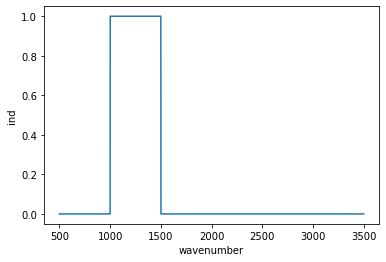

In [1]:
plt.plot(wavenumber, ind)
plt.xlabel('wavenumber')
plt.ylabel('ind');

These are all ways to check that we have the indices we want. Now we use that array to select the *portion* of the data we want. When we use the Boolean array to index with, the result is a shorter array containing only values where the Boolean array was True.



In [1]:
wavenumber[ind].shape

:RESULTS:
 | 1270 |
 :END:

We have to index *both* the x and y data to make this plot, because we can only plot arrays with the matching dimensions.



:RESULTS:
 : Text(0, 0.5, 'Intensity')
 
 :END:

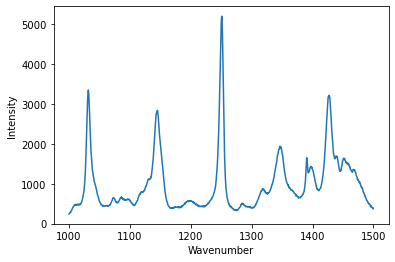

In [1]:
plt.figure()
plt.plot(wavenumber[ind], intensity[ind])
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')

### Summary



There was a lot of explanation above, so the brevity of this code may have been lost. Here is what we need to read the data and plot it (assuming you have already done the imports).



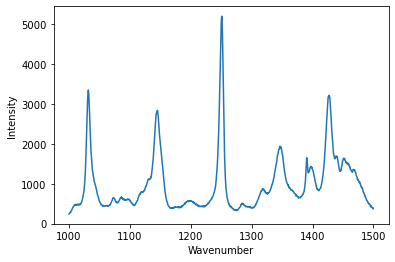

In [1]:
data = np.loadtxt('01-raman.txt')

wavenumber, intensity = data.T  # the transpose has data in rows for unpacking
ind = (wavenumber >= 1000) & (wavenumber < 1500)

plt.figure()
plt.plot(wavenumber[ind], intensity[ind])
plt.xlabel('Wavenumber')
plt.ylabel('Intensity');

In this simple example we have learned how to:

1.  Retrieve data from a url into a local file
2.  Read a local file of tab-delimited data into numpy arrays
3.  Visualize the arrays
4.  Select a subset of the arrays and visualize the subset.



## Data formats



The data in the previous example was loaded from a tab-delimited text file. There are many other kinds of files you might have to read from.



### Simple delimited text files



In a delimited text file, the data is represented in each line, with the values separated by a *delimiter*. In the tab-delimited data, tab characters are the separators. The other common delimiter is a comma, and these files are often called comma-separated value (CSV) files. For now, we limit the discussion to files containing numbers that are separated by commas.



In [1]:
with open('01-raman.csv') as f:
    lines = f.readlines()

print(len(lines))
print(lines[0:10])

7620
['5.000000000000000000e+02,2.943786900000000060e+02\n', '5.003937399999999798e+02,2.889220000000000255e+02\n', '5.007875099999999975e+02,2.860662199999999871e+02\n', '5.011812400000000025e+02,2.752228400000000192e+02\n', '5.015750100000000202e+02,2.751193799999999783e+02\n', '5.019687500000000000e+02,2.878137199999999893e+02\n', '5.023625200000000177e+02,2.995080300000000193e+02\n', '5.027562599999999975e+02,2.855656700000000114e+02\n', '5.031500199999999836e+02,2.926951900000000251e+02\n', '5.035437600000000202e+02,2.953395100000000184e+02\n']

You can see the numbers in each line are now separated by commas. `np.loadtxt` works for this file too, but we have to specify that the delimiter is a comma. See the [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) on `np.loadtxt` for more options.

Note: CSV is surprisingly complex, and there is a [dedicated library](https://docs.python.org/3/library/csv.html) for parsing it. We will stick to simple numerical csv files, which are easy to load in numpy.



In [1]:
np.loadtxt('01-raman.csv', delimiter=',')

array([[ 500.      ,  294.37869 ],
       [ 500.39374 ,  288.922   ],
       [ 500.78751 ,  286.06622 ],
       ...,
       [3499.2124  ,   87.969734],
       [3499.6062  ,   83.638931],
       [3500.      ,   84.009064]])

Let's do one more thing that is convenient here, which is we directly *unpack* the columns into variable names:



Text(0, 0.5, 'intensity')

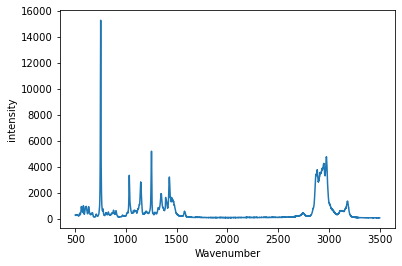

In [1]:
wave, intensity = np.loadtxt('01-raman.csv', delimiter=',', unpack=True)
plt.plot(wave, intensity)
plt.xlabel('Wavenumber')
plt.ylabel('intensity')

### more complex delimited files



This data is located at [https://www.itl.nist.gov/div898/handbook/datasets/MODEL-4_4_4.DAT](https://www.itl.nist.gov/div898/handbook/datasets/MODEL-4_4_4.DAT). There is a copy of the file in this directory.

If we examine the first few lines of this file, it appears that the first two lines are considered headers that tell you what is in the file. We need to skip these when reading the data. Also, each line appears as a string, with the values lining up in columns. This is sometimes called a fixed delimiter file.



In [1]:
with open('01-p-t.dat') as f:
    print(''.join(f.readlines()[0:5]))

Run          Ambient                            Fitted
Order  Day  Temperature  Temperature  Pressure    Value    Residual
 1      1      23.820      54.749      225.066   222.920     2.146
 2      1      24.120      23.323      100.331    99.411     0.920
 3      1      23.434      58.775      230.863   238.744    -7.881

I did something kind of fancy there. First, we read the lines and slice out the first 5 of them. That gives us a list of 5 lines. Then, I rejoin them so we get a single string, and then I printed it. That is to avoid getting two newlines (one from the line, and one from the print). We can tell print not to add a new line like this.



In [1]:
with open('01-p-t.dat') as f:
    for line in f.readlines()[0:5]:
        print(line, end='')

Run          Ambient                            Fitted
Order  Day  Temperature  Temperature  Pressure    Value    Residual
 1      1      23.820      54.749      225.066   222.920     2.146
 2      1      24.120      23.323      100.331    99.411     0.920
 3      1      23.434      58.775      230.863   238.744    -7.881

Either way, you can see there are two non-data lines here. We can still load this file with `np.loadtxt` we just tell it to skip the first two lines.



In [1]:
d = np.loadtxt('01-p-t.dat', skiprows=2)
d

#+begin_example
array([[  1.   ,   1.   ,  23.82 ,  54.749, 225.066, 222.92 ,   2.146],
       [  2.   ,   1.   ,  24.12 ,  23.323, 100.331,  99.411,   0.92 ],
       [  3.   ,   1.   ,  23.434,  58.775, 230.863, 238.744,  -7.881],
       [  4.   ,   1.   ,  23.993,  25.854, 106.16 , 109.359,  -3.199],
       [  5.   ,   1.   ,  23.375,  68.297, 277.502, 276.165,   1.336],
       [  6.   ,   1.   ,  23.233,  37.481, 148.314, 155.056,  -6.741],
       [  7.   ,   1.   ,  24.162,  49.542, 197.562, 202.456,  -4.895],
       [  8.   ,   1.   ,  23.667,  34.101, 138.537, 141.77 ,  -3.232],
       [  9.   ,   1.   ,  24.056,  33.901, 137.969, 140.983,  -3.014],
       [ 10.   ,   1.   ,  22.786,  29.242, 117.41 , 122.674,  -5.263],
       [ 11.   ,   2.   ,  23.785,  39.506, 164.442, 163.013,   1.429],
       [ 12.   ,   2.   ,  22.987,  43.004, 181.044, 176.759,   4.285],
       [ 13.   ,   2.   ,  23.799,  53.226, 222.179, 216.933,   5.246],
       [ 14.   ,   2.   ,  23.661,  54.467, 227.

You may note, however, that the first two columns are floats, and not integers. We can fix that (if it matters), at the cost of some complexity. We specify the format of each column in the `dtype` argument. This leads to a structured data array ([https://docs.scipy.org/doc/numpy/user/basics.rec.html](https://docs.scipy.org/doc/numpy/user/basics.rec.html)).

The dtype formats are documented at [https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html#arrays-dtypes-constructing](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html#arrays-dtypes-constructing). The ones we use here are for 32-bit integers and floats.



In [1]:
d = np.loadtxt('01-p-t.dat', skiprows=2,
               dtype={'names': ('run order', 'day', 'ambient temperature', 'temperature', 'pressure', 'fitted value', 'residual'),
                      'formats': ('i4', 'i4', 'f4', 'f4', 'f4', 'f4', 'f4')})
d

#+begin_example
array([( 1, 1, 23.82 , 54.749, 225.066, 222.92 ,  2.146),
       ( 2, 1, 24.12 , 23.323, 100.331,  99.411,  0.92 ),
       ( 3, 1, 23.434, 58.775, 230.863, 238.744, -7.881),
       ( 4, 1, 23.993, 25.854, 106.16 , 109.359, -3.199),
       ( 5, 1, 23.375, 68.297, 277.502, 276.165,  1.336),
       ( 6, 1, 23.233, 37.481, 148.314, 155.056, -6.741),
       ( 7, 1, 24.162, 49.542, 197.562, 202.456, -4.895),
       ( 8, 1, 23.667, 34.101, 138.537, 141.77 , -3.232),
       ( 9, 1, 24.056, 33.901, 137.969, 140.983, -3.014),
       (10, 1, 22.786, 29.242, 117.41 , 122.674, -5.263),
       (11, 2, 23.785, 39.506, 164.442, 163.013,  1.429),
       (12, 2, 22.987, 43.004, 181.044, 176.759,  4.285),
       (13, 2, 23.799, 53.226, 222.179, 216.933,  5.246),
       (14, 2, 23.661, 54.467, 227.01 , 221.813,  5.198),
       (15, 2, 23.852, 57.549, 232.496, 233.925, -1.429),
       (16, 2, 23.379, 61.204, 253.557, 248.288,  5.269),
       (17, 2, 24.146, 31.489, 139.894, 131.506,  8.388)

This array should look different to you. First, each row is in (), and the dtype at the end looks different, with names and formats.

One benefit of this is you can now use human readable names to select the various columns. We will return to this idea later when we learn about Pandas.



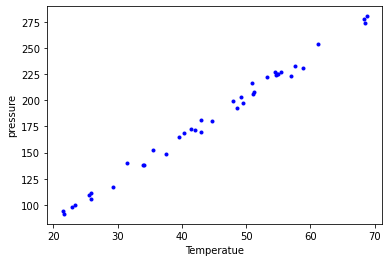

In [1]:
plt.plot(d['temperature'], d['pressure'], 'b. ')
plt.xlabel('Temperatue')
plt.ylabel('pressure');

Note that this is not a 2D array, even though it looks like one! It is considered a 1D array of records.



In [1]:
d.shape

| 40 |

It is not possible to slice this array like we did before. Instead we select columns by name.



In [1]:
d['temperature']

array([54.749, 23.323, 58.775, 25.854, 68.297, 37.481, 49.542, 34.101,
       33.901, 29.242, 39.506, 43.004, 53.226, 54.467, 57.549, 61.204,
       31.489, 68.476, 51.144, 68.774, 55.35 , 44.692, 50.995, 21.602,
       54.673, 41.449, 35.451, 42.989, 48.599, 21.448, 56.982, 47.901,
       40.285, 25.609, 22.971, 25.838, 49.127, 54.936, 50.917, 41.976],
      dtype=float32)

#### Summary



This data file was a text file, with a *header* that described some information about the data. The data itself was still delimited, but each column had a different type of data, e.g. in this case integers and floats. Some files may also have string data in columns. As the data gets more heterogeneous, it gets more challenging to read it into variables. In the worst case scenario, you can write a custom data parser, but this is hard work that should usually be avoided if possible.



### json data



json (javascript object notation) is another convenient data format ([https://www.json.org/json-en.html](https://www.json.org/json-en.html)). This data format stores data in a "key=value" format, and when you load it, you get a dictionary of the data. Let's see the first few characters of this file. Why the first few characters? A json file may be only one line as defined by newlines.



In [1]:
with open('01-raman.json') as f:
    print(len(f.readlines()))

1

But you can see there are a lot of characters:



In [1]:
with open('01-raman.json') as f:
    print(len(f.read()))

165882

Let's see the first 50 of the characters.



In [1]:
with open('01-raman.json') as f:
    print(''.join(f.read()[0:50]))

{"wavenumber": [500.0, 500.39374, 500.78751, 501.1

Here, "wavenumber" is a key, and it has a value (the thing on the other side of the :) that is an array of numbers. Luckily, it is easy to load this in Python with the json library.



In [1]:
import json

with open('01-raman.json') as f:
    d = json.load(f)

type(d), d.keys()

| dict | dict_keys | ((wavenumber intensity)) |

Note that this does not read the data into numpy arrays. We have a list for these instead. We can convert them to arrays if we need to.



In [1]:
type(['wavenumber'])

list

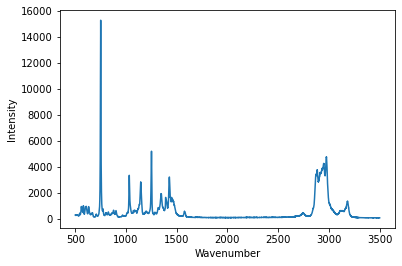

In [1]:
plt.plot(d['wavenumber'], d['intensity'])
plt.xlabel('Wavenumber')
plt.ylabel('Intensity');

It is fine to plot with these lists, but if you need to do any array operations or analysis on them, you may need to convert them to arrays first (although many numpy functions work on lists just fine).



### There are many more data formats



There are many more formats. For most of these, there are standard libraries for reading them data into an array form that you can use. You should usually search for a library that can read your data first, rather than try to implement your own parser.

-   **netcdf:** [https://unidata.github.io/netcdf4-python/netCDF4/index.html](https://unidata.github.io/netcdf4-python/netCDF4/index.html)
-   **hdf5:** [https://www.h5py.org/](https://www.h5py.org/)
-   **xml:** [https://docs.python.org/3/library/xml.html](https://docs.python.org/3/library/xml.html)
-   **matlab .mat files:** [https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html)
-   **binary data files:** [https://www.devdungeon.com/content/working-binary-data-python](https://www.devdungeon.com/content/working-binary-data-python)
-   **scipy io routines:** [https://docs.scipy.org/doc/scipy/reference/io.html](https://docs.scipy.org/doc/scipy/reference/io.html)
-   **molecular simulation files:** [https://wiki.fysik.dtu.dk/ase/ase/io/io.html#module-ase.io](https://wiki.fysik.dtu.dk/ase/ase/io/io.html#module-ase.io)
-   **yaml:** [https://pyyaml.org/wiki/PyYAMLDocumentation](https://pyyaml.org/wiki/PyYAMLDocumentation)
-   **config files:** [https://docs.python.org/3/library/configparser.html](https://docs.python.org/3/library/configparser.html)
-   **Excel:** [https://openpyxl.readthedocs.io/en/stable/index.html](https://openpyxl.readthedocs.io/en/stable/index.html)



## Summary



Today the focus was on orienting ourselves to the main ideas of reading data files. These are:

1.  What kind of data file is it?
2.  Is there a library function that makes it easy to read?
3.  How do you get the data into arrays and variables for further analysis.

We also examined how to make simple visualizations of the data.

